# Logistic Regression – Maximum Likelihood & Cross Entropy (Step-by-Step)

## Problem with Step Function & Perceptron

We started Logistic Regression by first understanding the **Perceptron Trick**.

- Initially, we used a **step function**
- Step function makes **hard decisions**
- Because of this:
  - No smooth learning
  - No guarantee of best line
  - Different random runs give different lines

Replacing step function with a **sigmoid function** gave minor improvement,  
but still **no guarantee of optimal solution**.

Why?

Because we had **no objective measure** to decide:
> “Which line is actually the best?”

---

## Why We Need a Loss Function

Machine Learning does not guess blindly.

For every problem:
- We define a **Loss Function**
- Loss function tells:
  - How wrong the model is
  - Which model is better

Then:
- We **minimize the loss**
- The weights at minimum loss are the **optimal solution**

This worked in **Linear Regression**  
Now we must do the **same for Logistic Regression**

---

## Small Dataset Example (4 Points)

We take:
- 4 data points
- 2 different models (two lines)

Visually:
- Model 2 looks better
- But **visual judgment is not reliable**

So we need a **mathematical comparison**

---

## Using Maximum Likelihood

To compare models **mathematically**, we use:

> **Maximum Likelihood Estimation (MLE)**

Idea:
- A good model should assign **high probability** to correct labels
- Multiply probabilities of all data points
- Higher product ⇒ Better model

---

## Prediction Formula

For Logistic Regression:

$$
\hat{y} = \sigma(z)
$$

Where:

$$
z = \sum w_i x_i
$$

- Points above the line → probability closer to **1**
- Points below the line → probability closer to **0**

---

## Model-1: Probability Assignment

Positive region = **Above the line**

| Point Color | $P(G)$ | $P(R)$ |
|------------|--------|--------|
| Green      | 0.7    | 0.3    |
| Green      | 0.4    | 0.6    |
| Red        | 0.4    | 0.6    |
| Red        | 0.2    | 0.8    |

### Likelihood (Model-1)

Only take probability of **true class**:

$$
L_1 = 0.7 \times 0.4 \times 0.4 \times 0.8 = 0.089
$$

---

## Model-2: Probability Assignment

Positive region is **better aligned**

| Point Color | $P(G)$ | $P(R)$ |
|------------|--------|--------|
| Green      | 0.7    | 0.3    |
| Green      | 0.6    | 0.4    |
| Red        | 0.3    | 0.7    |
| Red        | 0.4    | 0.6    |

### Likelihood (Model-2)

$$
L_2 = 0.7 \times 0.6 \times 0.6 \times 0.7 = 0.176
$$

---

## Model Comparison

$$
L_2 > L_1
$$

So:

> **Model-2 is mathematically better than Model-1**

This is **Maximum Likelihood Selection**

---

## Problem with Multiplying Probabilities

In real datasets:
- Thousands of points
- Probabilities < 1
- Product becomes **extremely small**

This causes:
- Numerical underflow
- Impossible comparison

---

## Solution: Log Likelihood

We use logarithm:

$$
\log(ab) = \log a + \log b
$$

So instead of product:

$$
\log L = \sum \log(\text{probabilities})
$$

---

## Negative Log Likelihood

Log of numbers between 0 and 1 is **negative**

To convert it into a minimization problem:

$$
\text{Loss} = - \log L
$$

This is called:

> **Cross Entropy Loss**

---

## Cross Entropy Loss Formula (Binary Classification)

For one data point:

$$
\text{Loss} =
- \big[
y \log(\hat{y}) + (1-y)\log(1-\hat{y})
\big]
$$

For all points:

$$
J = - \sum_{i=1}^{n}
\big[
y_i \log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\big]
$$

(Optional average)

$$
J = - \frac{1}{n} \sum_{i=1}^{n}
\big[
y_i \log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\big]
$$

---

## Why This Formula Works

- If point is **Green** ($y=1$):
  - Loss = $-\log(\hat{y})$
- If point is **Red** ($y=0$):
  - Loss = $-\log(1-\hat{y})$

Single formula handles **both cases**

---

## Final Understanding

- Logistic Regression uses **Maximum Likelihood**
- Product of probabilities ⇒ **Likelihood**
- Log of likelihood ⇒ **Log Likelihood**
- Negative log likelihood ⇒ **Cross Entropy Loss**
- We **minimize** Cross Entropy
- No closed-form solution
- Optimization is done using **Gradient Descent**

---

## What Comes Next

Next step:
- Apply **Gradient Descent**
- Update weights
- Build Logistic Regression **from scratch in Python**


# Applying Gradient Desent

# Logistic Regression — Gradient Descent (From Loss to Code)

## 1. Recap: Why Gradient Descent?

In the last video, we derived the **loss (cost) function** for Logistic Regression.

Key point:
- Logistic Regression **does NOT have a closed-form solution**
- You **cannot** directly compute weights using a formula
- The **only option** is to apply **Gradient Descent** to find the optimal solution

In this video:
- We apply **Gradient Descent** on the derived loss function
- Compute the **optimal weights**
- Implement everything **from scratch in Python**

---

## 2. Dataset Representation

Assume:
- Number of rows = $m$
- Number of input columns = $n$

Dataset structure:

$$
X =
\begin{bmatrix}
x_{11} & x_{12} & \dots & x_{1n} \\
x_{21} & x_{22} & \dots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m1} & x_{m2} & \dots & x_{mn}
\end{bmatrix}
$$

Target column:

$$
y =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix}
$$

---

## 3. Weight Vector (Including Intercept)

If input features = $n$

Then number of parameters:

$$
n + 1
$$

Weights:

$$
W =
\begin{bmatrix}
w_0 \\
w_1 \\
w_2 \\
\vdots \\
w_n
\end{bmatrix}
$$

- $w_0$ = intercept (bias)
- To handle bias, we **add a column of 1s** in $X$

Updated input matrix:

$$
X =
\begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1n} \\
1 & x_{21} & x_{22} & \dots & x_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{m1} & x_{m2} & \dots & x_{mn}
\end{bmatrix}
$$

---

## 4. Prediction Formula (Vectorized)

Linear combination:

$$
Z = XW
$$

Sigmoid activation:

$$
\hat{Y} = \sigma(Z) = \frac{1}{1 + e^{-Z}}
$$

Where:
- $\hat{Y}$ is a vector of predicted probabilities
- Each element = prediction for one row

---

## 5. Loss Function (Binary Cross-Entropy)

Previously derived loss:

$$
J(W) =
-\frac{1}{m}
\sum_{i=1}^{m}
\left(
y_i \log(\hat{y}_i)
+ (1 - y_i)\log(1 - \hat{y}_i)
\right)
$$

Matrix form:

$$
J(W) =
-\frac{1}{m}
\left(
Y^T \log(\hat{Y})
+ (1 - Y)^T \log(1 - \hat{Y})
\right)
$$

---

## 6. Why Gradient Descent?

- No closed-form solution
- Loss function is **convex**
- Gradient Descent guarantees convergence to global minimum

Goal:

$$
\min_W J(W)
$$

---

## 7. Gradient Descent Update Rule

General formula:

$$
W := W - \alpha \frac{\partial J(W)}{\partial W}
$$

Where:
- $\alpha$ = learning rate
- $\frac{\partial J}{\partial W}$ = gradient

---

## 8. Gradient of Logistic Loss

Final gradient expression:

$$
\frac{\partial J(W)}{\partial W}
=
\frac{1}{m} X^T(\hat{Y} - Y)
$$

This comes from:
- Chain rule
- Derivative of sigmoid
- Matrix calculus simplification

---

## 9. Final Weight Update Equation

$$
W := W - \alpha \cdot \frac{1}{m} X^T(\hat{Y} - Y)
$$

This is the **core equation** of Logistic Regression training.

---

## 10. Matrix Shapes (Important)

| Term |.......Shape.......|
|----|------------|
| $X$ | $m \times (n+1)$ |
| $W$ | $(n+1) \times 1$ |
| $\hat{Y}$ | $m \times 1$ |
| $Y$ | $m \times 1$ |
| Gradient | $(n+1) \times 1$ |

Shapes **match perfectly**, so matrix multiplication is valid.

---

## 11. Algorithm (Step-by-Step)

1. Add bias column to $X$
2. Initialize weights $W$ (zeros or small random values)
3. Repeat for $N$ iterations:
   - Compute $Z = XW$
   - Compute $\hat{Y} = \sigma(Z)$
   - Compute gradient
   - Update weights
4. Stop when loss converges

---

## 12. Python Implementation (Concept)

- Used `make_classification` dataset
- Implemented:
  - Sigmoid function
  - Gradient descent loop
- Compared:
  - sklearn Logistic Regression
  - Custom Gradient Descent Logistic Regression

Observation:
- Lines are **very close**
- Differences due to:
  - Solver
  - Learning rate
  - Number of iterations
  - Internal optimizations in sklearn

Increasing iterations → lines overlap more.

---

## 13. Final Takeaway

- Logistic Regression is **not magic**
- It is:
  - Sigmoid
  - Cross-entropy loss
  - Gradient descent
- Everything works because of **matrix math**
- Once math is clear → code becomes easy

---

## 14. What’s Next

Upcoming topics:
- Classification Metrics
- Logistic Regression Hyperparameters
- Softmax Regression (Multi-class)
- Polynomial Logistic Regression
- Regularization (L1, L2)


## Why is logistic regression loss not solvable in closed-form?
Logistic regression involves a non-linear log-likelihood function due to the sigmoid, which does not simplify to solve weights algebraically, necessitating iterative optimization like gradient descent.

## What is the logistic regression loss function expressed as a matrix equation?
It is typically expressed as the sum of log terms involving predicted probabilities and true labels, compactly reformulated using matrix multiplication and log operations over vectors/matrices representing data and weights.

## How do you compute the gradient of the logistic loss function?
The gradient is derived via matrix calculus, applying the chain rule to the log of predicted probabilities, resulting in a formula involving data matrix transposes multiplied by the difference between predictions and actual labels.

## What does the gradient descent weight update look like?
The weights are updated as the old weights minus the learning rate multiplied by the gradient of the loss w.r.t those weights, iteratively converging to the loss minimum.

## How does the custom gradient descent implementation compare with sklearn’s LogisticRegression?
When correctly implemented and tuned, the custom gradient descent approach closely approximates sklearn’s results, though convergence speed and exact values may vary depending on hyperparameters and solver details.

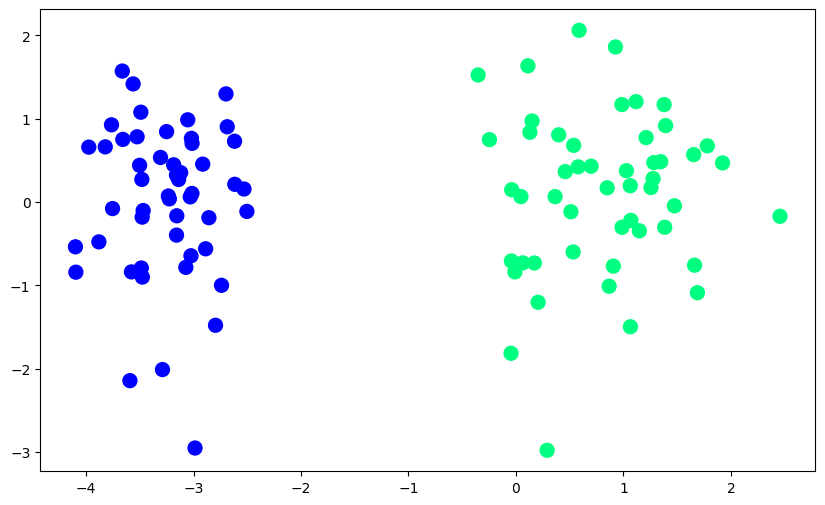

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [ ]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None ,solver='sag')
lor.fit(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [ ]:
print(lor.coef_)
print(lor.intercept_)

[[4.81320785 0.21287737]]
[5.78568648]


In [ ]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [ ]:
def gd(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])

    return weights[1:],weights[0]

def sigmoid(z):
    return 1/(1 + np.exp(-z))

(-3.0, 2.0)

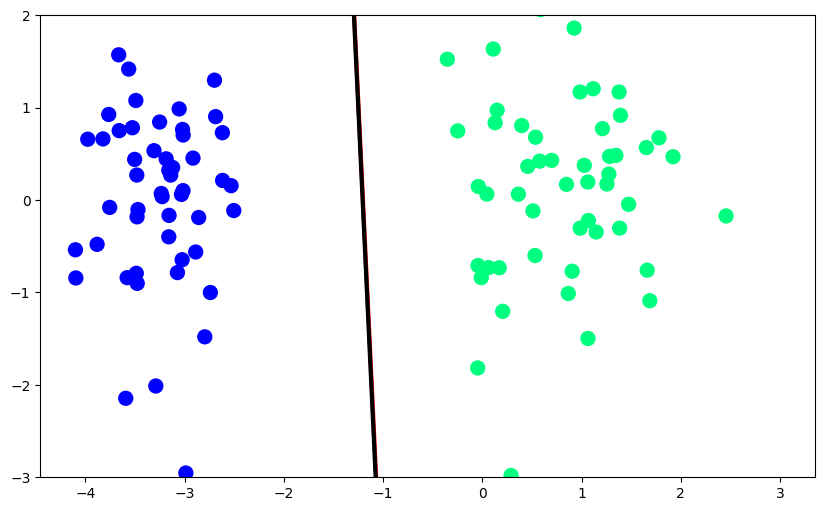

In [ ]:
coef_,intercept_ = gd(X,y)
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [ ]:
np.insert(X,0,1,axis=1)

array([[ 1.        ,  0.51123145, -0.11697552],
       [ 1.        ,  0.06316371, -0.73115232],
       [ 1.        , -0.0425064 , -0.7081059 ],
       [ 1.        , -3.2891569 , -2.01199214],
       [ 1.        ,  0.1111445 ,  1.63493163],
       [ 1.        , -2.53070306,  0.15599044],
       [ 1.        , -3.49036198,  1.07782053],
       [ 1.        ,  0.3976447 ,  0.80626713],
       [ 1.        , -0.24666899,  0.74859527],
       [ 1.        , -3.65803446,  0.75152794],
       [ 1.        , -3.47658131, -0.90114581],
       [ 1.        , -3.47815037, -0.1815243 ],
       [ 1.        ,  0.29004249, -2.98092432],
       [ 1.        ,  1.11761831,  1.20500136],
       [ 1.        , -3.52530398,  0.78302407],
       [ 1.        ,  0.69929128,  0.42968688],
       [ 1.        ,  0.17089733, -0.73229726],
       [ 1.        , -3.57785124, -0.83930476],
       [ 1.        ,  0.12965489,  0.83727062],
       [ 1.        , -3.46888717, -0.10255323],
       [ 1.        , -3.97487212,  0.658

In [ ]:
X1 = np.insert(X,0,1,axis=1)
np.ones(X1.shape[1])

array([1., 1., 1.])